## MICROSOFT PROJECT

## Importing necessary packages 

In [1]:
# pandas for Data analysis and Data manupulation
import pandas as pd
# numpy for mathematical operations
import numpy as np
#import warnings for filtering warnings
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## First Data

In [2]:
# loading the first data set (gross_dataset)
data = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Data Understanding

In [3]:
# describe to give us the summary statistics for numerical columns
data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


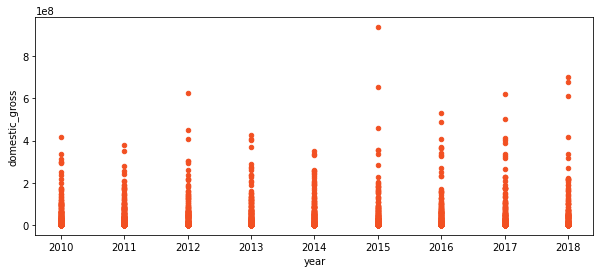

In [4]:
data.plot(kind = 'scatter', x = 'year', y = 'domestic_gross', color = '#f25022', figsize = (10, 4));

In [5]:
# info for description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Studio, domestic_gross and foreign_gross columns has missing values and foreign_gross has string values instead of integers.

In [6]:
# shape to find number of rows and columns
data.shape

(3387, 5)

The dataset has a total 3387 rows and 5 columns.

In [7]:
# head to find the first 5 rows of our dataset
data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
# tail to find the last rows of our dataset
data.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


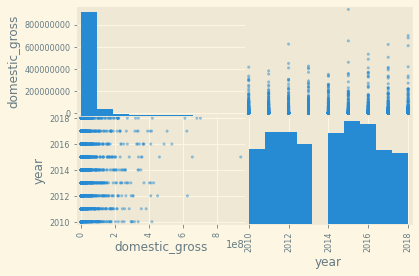

In [9]:
# Relationship between the variables
plt.style.use('Solarize_Light2')
pd.plotting.scatter_matrix(data);

### Data Preparation/ Cleaning

####  Null Values  and Missing Values

In [10]:
# Checking for Null Values
data.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [11]:
# Null Values in percentages 
null_perct = ((data.isna().sum())/len(data)) * 100
null_perct

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [12]:
# checking the unique values in foreign_gross column
data.foreign_gross.value_counts()

1200000      23
1100000      14
1900000      12
4200000      12
1300000      11
             ..
203200000     1
268300000     1
577700000     1
203500000     1
3800          1
Name: foreign_gross, Length: 1204, dtype: int64

In [13]:
# removing the special caracter and changing the foreign_gross column into a float
data['foreign_gross'] = data['foreign_gross'].str.replace(',','').astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Mean of foreign_gross: 74872810.15046637
Median of foreign_gross: 18700000.0


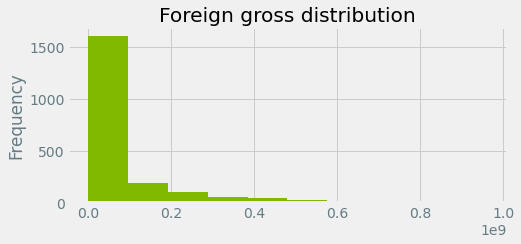

In [15]:
# Dealing with Foreign_gross Nan Values
plt.style.use('fivethirtyeight')
ax = data['foreign_gross'].plot(kind = 'hist',bins = 10, figsize = (7,3), color = '#7fba00')
ax.set_title('Foreign gross distribution')
ax;
print('Mean of foreign_gross:', data['foreign_gross'].mean())
print('Median of foreign_gross:', data['foreign_gross'].median())


The distribution of foreign gross is positively skewed hence we will use median to replace the nan values.

In [16]:
# Replacing the nan values in foreign_gross with the median
data['foreign_gross'] = data['foreign_gross'].fillna(value = data['foreign_gross'].median())

In [17]:
# Confirming the changes made
data.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

Mean of domestic_gross: 28745845.06698422
Median of domestic_gross: 1400000.0


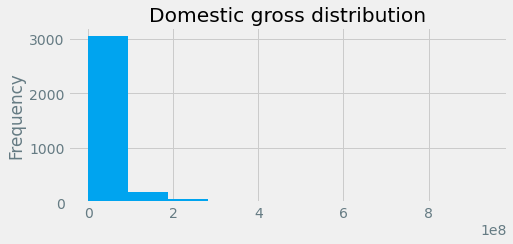

In [18]:
# Dealing with the missing values for domestic_gross
plt.style.use('fivethirtyeight')
ax = data['domestic_gross'].plot(kind = 'hist',bins = 10, figsize = (7,3), color = '#00a4ef')
ax.set_title('Domestic gross distribution')
ax;
print('Mean of domestic_gross:', data['domestic_gross'].mean())
print('Median of domestic_gross:', data['domestic_gross'].median())

The distribution of domestic gross is positively skewed. We can use median instead of mean.

In [19]:
# Replacing the nan values in domestic_gross with the median
data['domestic_gross'] = data['domestic_gross'].fillna(value = data['domestic_gross'].median())

In [20]:
# Dealing with studio missing values 
data = data.dropna()

Dropped the rows with nan values since they were a few.

In [21]:
# confirm for the changes
data.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [22]:
# Checking if there is missing values in the placeholders
for i in ['studio', 'domestic_gross', 'foreign_gross', 'year']:
    print('Values for {}:{}\n'.format(i, data[i].unique()))

Values for studio:['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 'AF' 'TFA' 'Myr.'
 'BM&DH' 'SEG' 'PalT' 'Outs' 'OutF' 'BSM' 'WAMCR' 'PM&E' 'A24' 'Cdgm.'
 'Distrib.' 'Imax' 'PH' 'HTR' 'ELS' 'PI' 'E1' 'TV

No missing values denoted by placeholders

#### Duplicates

In [23]:
# checking for duplicates in our dataset
dup_data = data.duplicated().any()
dup_data

False

There is no duplicate values in our dataset

In [24]:
# final clean data
clean_data = data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


### Univariate Analysis and Bivariate Analysis

In [25]:
# Total Gross
clean_data['total_gross'] = clean_data['domestic_gross'] + clean_data['foreign_gross']
clean_data.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [26]:
# Top 10 studio with the highest production(title) 

highest = clean_data.groupby('studio')['title'].count().sort_values(ascending = False).head(10)
highest.sum()

1268

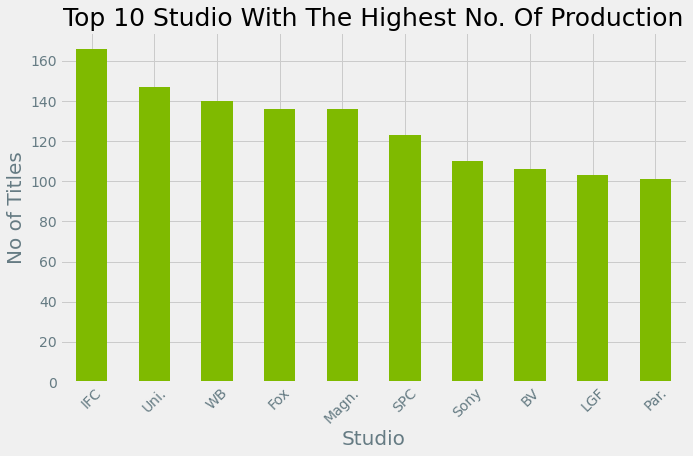

In [27]:
# Bar graph for top 10 studios with highest no of production

highest.plot.bar(figsize = (10,6), color = '#7fba00')
plt.title('Top 10 Studio With The Highest No. Of Production', fontsize = 25)
plt.xlabel('Studio', fontsize = 20)
plt.ylabel('No of Titles', fontsize = 20)
plt.xticks(rotation = 45)
plt.show();

IFC studios has the highest number of production(has the highest number of title) 166 in total.

In [28]:
studio_gross = clean_data.groupby('studio')['total_gross'].sum().sort_values(ascending = False).head()
studio_gross

studio
BV      4.425028e+10
Fox     3.104277e+10
WB      3.102295e+10
Uni.    2.981326e+10
Sony    2.248124e+10
Name: total_gross, dtype: float64

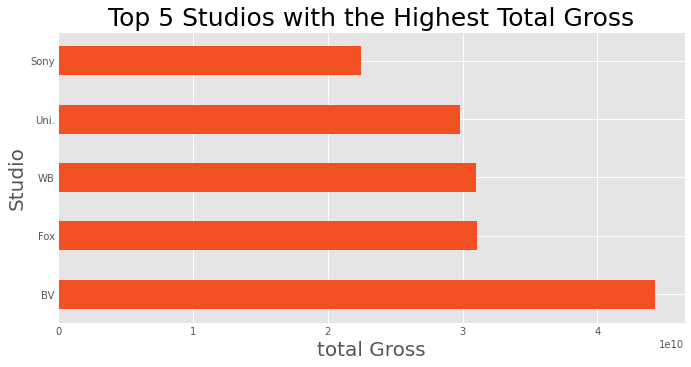

In [29]:
#plotting studios with the highest total_gross
plt.style.use('ggplot')
ax =studio_gross.plot(kind = 'barh',figsize = (10, 5),  width = 0.5, color = '#f25022')
ax.set_title('Top 5 Studios with the Highest Total Gross', fontsize = 25)
ax.set_xlabel('total Gross', fontsize = 20)
ax.set_ylabel('Studio',fontsize = 20)
ax;

BV studio have the highest total gross of $44,250,280,000 

In [30]:
clean_data.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [31]:
# Checking for correlation between Variables.

clean_data.corr()

,domestic_gross,foreign_gross,year,total_gross
domestic_gross,1.000000,0.784059,0.020003,0.913172
foreign_gross,0.784059,1.000000,0.056118,0.968957
year,0.020003,0.056118,1.000000,0.044817
total_gross,0.913172,0.968957,0.044817,1.000000


Foreign gross and total gross are highly positively correlated with a value of 0.968957.

In [32]:
corr_data = clean_data[['domestic_gross', 'foreign_gross', 'total_gross']]
corr_data.head()


,domestic_gross,foreign_gross,total_gross
0,415000000.0,652000000.0,1.067000e+09
1,334200000.0,691300000.0,1.025500e+09
2,296000000.0,664300000.0,9.603000e+08
3,292600000.0,535700000.0,8.283000e+08
4,238700000.0,513900000.0,7.526000e+08


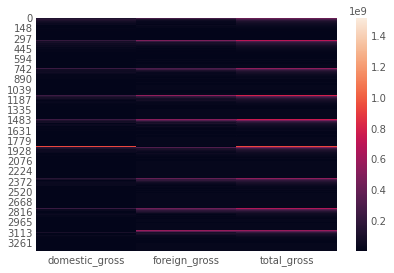

In [33]:
sns.heatmap(corr_data);

### SECOND DATA

In [34]:
# loading the first data set (tmbd dataset)
tmbd = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col = 0)
tmbd

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [35]:
tmbd.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

#### Drop Unnecessary Columns 

In [36]:
tmbd.drop(['id','genre_ids','release_date'], axis = 1, inplace = True)

In [37]:
tmbd.head()

,original_language,original_title,popularity,title,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,Toy Story,7.9,10174
4,en,Inception,27.920,Inception,8.3,22186


### Data Understanding

In [38]:
# describe to give us the summary statistics for numerical columns
tmbd.describe()

,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000
mean,3.130912,5.991281,194.224837
std,4.355229,1.852946,960.961095
min,0.600000,0.000000,1.000000
25%,0.600000,5.000000,2.000000
50%,1.374000,6.000000,5.000000
75%,3.694000,7.000000,28.000000
max,80.773000,10.000000,22186.000000


In [39]:
# info for description of the data
tmbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   original_title     26517 non-null  object 
 2   popularity         26517 non-null  float64
 3   title              26517 non-null  object 
 4   vote_average       26517 non-null  float64
 5   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


Dataset does not contain any missing values

In [40]:
# shape to find number of rows and columns
tmbd.shape

(26517, 6)

Dataset contains 26517 rows and 5 columns

In [41]:
# head to find the first 5 rows of our dataset
tmbd.head()

,original_language,original_title,popularity,title,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,Toy Story,7.9,10174
4,en,Inception,27.920,Inception,8.3,22186


In [42]:
# tail to find the last rows of our dataset
tmbd.tail()

,original_language,original_title,popularity,title,vote_average,vote_count
26512,en,Laboratory Conditions,0.6,Laboratory Conditions,0.0,1
26513,en,_EXHIBIT_84xxx_,0.6,_EXHIBIT_84xxx_,0.0,1
26514,en,The Last One,0.6,The Last One,0.0,1
26515,en,Trailer Made,0.6,Trailer Made,0.0,1
26516,en,The Church,0.6,The Church,0.0,1


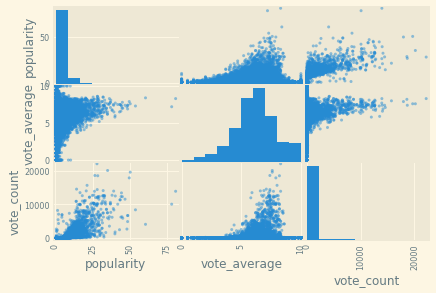

In [43]:
# Relationship between the variables
plt.style.use('Solarize_Light2')
pd.plotting.scatter_matrix(tmbd);

### Data Preparation/ Cleaning

####  Null Values  and Missing Values

In [44]:
# Checking for Null Values
tmbd.isna().sum()

original_language    0
original_title       0
popularity           0
title                0
vote_average         0
vote_count           0
dtype: int64

The dataset does not contain any missing values.

#### Duplicates

In [45]:
# checking for duplicates in our dataset
dup_tmbd = tmbd.duplicated().sum()
dup_tmbd

1024

In [46]:
tmbd.drop_duplicates(inplace = True)
tmbd.duplicated().any()

False

The dataset does not contain any duplicate values.

In [47]:
# Cleaned dataset
tmbd.head()

,original_language,original_title,popularity,title,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610
2,en,Iron Man 2,28.515,Iron Man 2,6.8,12368
3,en,Toy Story,28.005,Toy Story,7.9,10174
4,en,Inception,27.920,Inception,8.3,22186


### Univariate and Bivariate Analysis

In [48]:
# 10 most popular title (highest Vote_count)

title = tmbd.groupby('title')['vote_count'].sum().sort_values(ascending = False).head(5)
title


title
Inception       22186
Deadpool        20175
The Avengers    19673
Avatar          18676
Interstellar    18597
Name: vote_count, dtype: int64

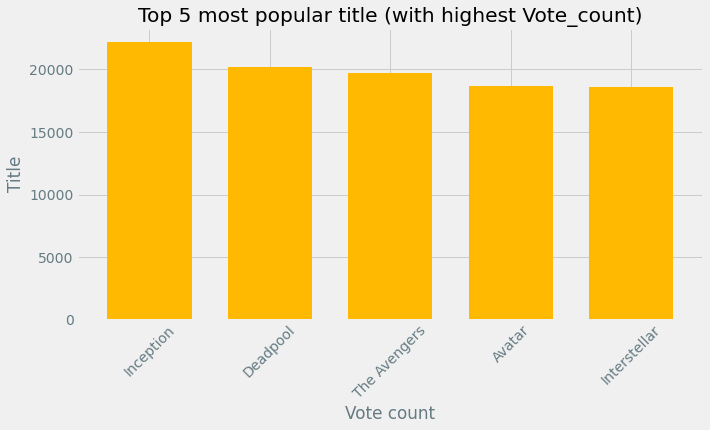

In [49]:
#plotting 5 most popular title (with highest vote count)

plt.style.use('fivethirtyeight')
ax = title.plot(kind = 'bar',figsize = (10, 5),  width = 0.7, color = '#ffb900')
ax.set_title('Top 5 most popular title (with highest Vote_count)')
ax.set_xlabel('Vote count')
ax.set_ylabel('Title')
plt.xticks(rotation = 45)
ax;

Inception is the title with the highest vote count of 22186.

In [50]:
# 5 most used original language

original = tmbd.groupby('original_language')['original_language'].count().sort_values(ascending = False).head()
original


original_language
en    22380
fr      483
es      439
ru      295
ja      244
Name: original_language, dtype: int64

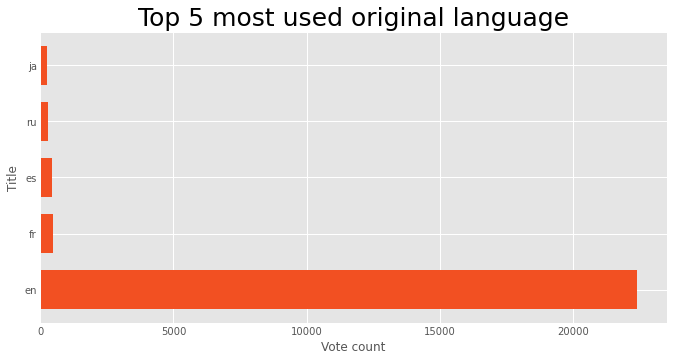

In [51]:
#plotting Top 5 most used original language

plt.style.use('ggplot')
ax = original.plot(kind = 'barh', figsize = (10, 5),  width = 0.7, color = '#f25022')
ax.set_title('Top 5 most used original language', fontsize = 25)
ax.set_xlabel('Vote count')
ax.set_ylabel('Title')
plt.xticks(rotation = 0)
ax;

En original language was the most used language with a total of 22380 vote count.

In [52]:
#10 most liked videos(titles vs vote average)

liked = tmbd.groupby('title')['vote_average'].max().sort_values(ascending = False).head(10)
liked

title
Henry IV Part 2: Shakespeare's Globe Theatre                           10.0
Forever Now                                                            10.0
For When We Argue                                                      10.0
For This I Went to College?                                            10.0
The Shadow of Two Flies Upon a Pin                                     10.0
Footsteps in the Snow                                                  10.0
The Shepherd                                                           10.0
Following the Ninth: In the Footsteps of Beethoven's Final Symphony    10.0
First You Dream: The Music of Kander & Ebb                             10.0
First Round Down                                                       10.0
Name: vote_average, dtype: float64

In [53]:
# correlation between variables
tmbd.corr()

,popularity,vote_average,vote_count
popularity,1.000000,0.057167,0.685287
vote_average,0.057167,1.000000,0.079168
vote_count,0.685287,0.079168,1.000000


Vote count and popularity are highly positively correlated with a value of 0.685287.

### THIRD DATA

In [54]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [55]:
budget['production_budget'] = budget['production_budget'].str.replace('$','')
budget['production_budget'] = budget['production_budget'].str.replace(',','')
budget['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: object

In [56]:
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$','')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',','')
budget['domestic_gross']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: object

In [57]:
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$','')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',','')
budget['worldwide_gross']

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [58]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [59]:
budget.drop(['id', 'release_date'], axis = 1, inplace = True)

In [60]:
budget.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [61]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   object
 2   domestic_gross     5782 non-null   object
 3   worldwide_gross    5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


In [62]:
budget['production_budget'] = budget['production_budget'].astype('float')
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   object 
 3   worldwide_gross    5782 non-null   object 
dtypes: float64(1), object(3)
memory usage: 180.8+ KB


In [63]:
budget['domestic_gross'] = budget['domestic_gross'].astype('float')
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   object 
dtypes: float64(2), object(2)
memory usage: 180.8+ KB


In [64]:
budget['worldwide_gross'] = budget['worldwide_gross'].astype('float')
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(1)
memory usage: 180.8+ KB


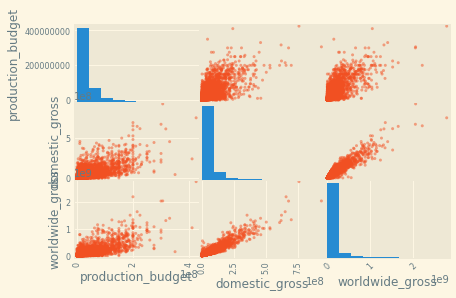

In [65]:
# Relationship between the variables
plt.style.use('Solarize_Light2')
pd.plotting.scatter_matrix(budget, color = '#f25022')
plt.xticks(rotation = 45);

Production budget, domestic gross and worldwide gross are positively skewed. Production budget is correlated with domestic gross, worldwide gross is positively skewed with domestic gross.

In [66]:
# Comparing highest profit made between domestic gross and worldwide grose
budget.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000.0,760507625.0,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [67]:
budget['domestic_profit'] = budget['domestic_gross'] - budget['production_budget']

In [68]:
budget['worldwide_profit'] = budget['worldwide_gross'] - budget['production_budget']

In [69]:
budget.head()

,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08


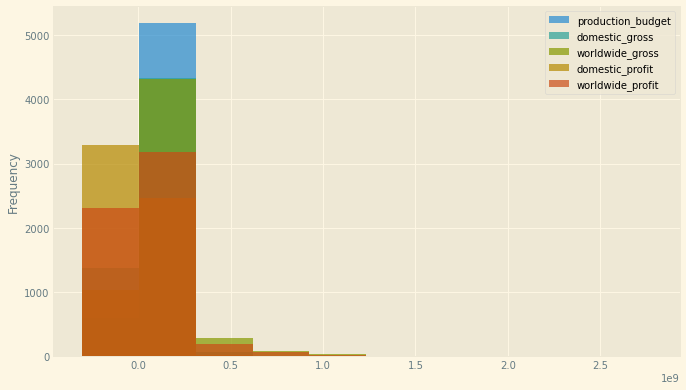

In [70]:
budget.plot.hist(alpha = 0.7, figsize = (10,6));

In [71]:
total_domestic_profit = sum(budget['domestic_profit']) 
total_domestic_profit

59471164413.0

In [72]:
total_worldwide_profit = sum(budget['worldwide_profit'])
total_worldwide_profit 

346340087429.0

In [73]:
if total_domestic_profit > total_worldwide_profit:
    print("Domestic market has more profit than Worldwide market.")
else:
    print("Worldwide market has more profit than Domestic market.")

Worldwide market has more profit than Domestic market.


Which market should microsoft invest in : It should invest in Worldwide market since it has more Profit than Domestic market.

In [74]:
# Top 10 Movies with Highest Production Budget
mov = budget.groupby('movie')['production_budget'].max().sort_values(ascending = False).head(10)
mov

movie
Avatar                                         425000000.0
Pirates of the Caribbean: On Stranger Tides    410600000.0
Dark Phoenix                                   350000000.0
Avengers: Age of Ultron                        330600000.0
Star Wars Ep. VIII: The Last Jedi              317000000.0
Star Wars Ep. VII: The Force Awakens           306000000.0
Spectre                                        300000000.0
Avengers: Infinity War                         300000000.0
Justice League                                 300000000.0
Pirates of the Caribbean: At Worldâs End     300000000.0
Name: production_budget, dtype: float64

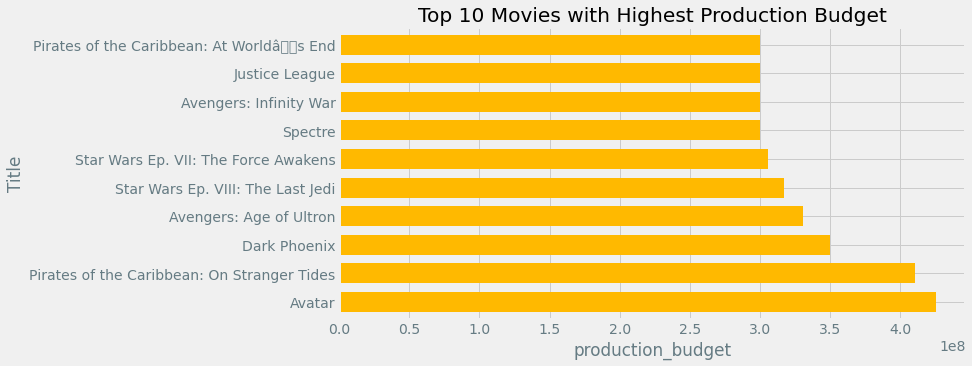

In [75]:
plt.style.use('fivethirtyeight')
ax = mov.plot(kind = 'barh',figsize = (10, 5),  width = 0.7, color = '#ffb900')
ax.set_title('Top 10 Movies with Highest Production Budget')
ax.set_xlabel('production_budget')
ax.set_ylabel('Title')
ax;

Avatar is the movie with the highest Production Budget.

In [76]:
#heatmap matrix
budget.corr()

,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
production_budget,1.000000,0.685682,0.748306,0.099742,0.608752
domestic_gross,0.685682,1.000000,0.938853,0.792663,0.926605
worldwide_gross,0.748306,0.938853,1.000000,0.656626,0.981811
domestic_profit,0.099742,0.792663,0.656626,1.000000,0.756767
worldwide_profit,0.608752,0.926605,0.981811,0.756767,1.000000


worldwide gross and domestic gross has the highest positive correlation of 0.938853

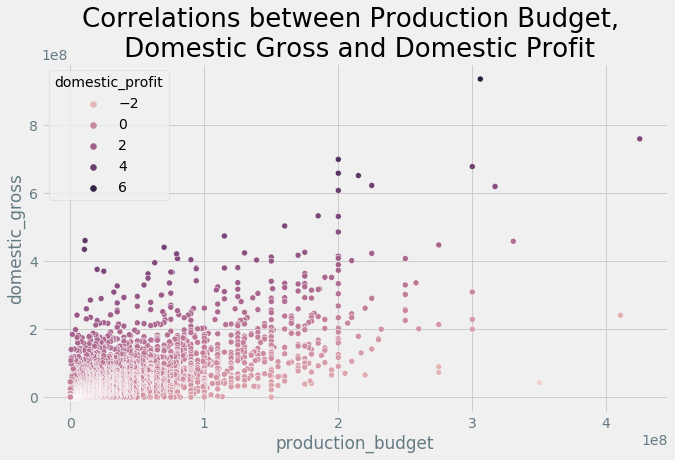

In [77]:
# Correlations between Production Budget,Domestic Gross and Domestic Profit

plt.style.use('_classic_test_patch')
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = budget, hue='domestic_profit')
plt.title("Correlations between Production Budget, \n Domestic Gross and Domestic Profit", fontsize=26)
plt.show() 

We have a positive correlation between production budget, domestic gross and domestic profit.

### FOURTH DATA

In [78]:
# Creating a connection with the database
conn = sqlite3.connect("zippedData/im.db")

#Creating a cursor to get tables in the dataset
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master where type = 'table'
;
""")
# Fetching the results
tables = cur.fetchall()
tables


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [79]:
# Display of the basics table
df = pd.read_sql("""
SELECT*
FROM movie_basics
;
""",conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [81]:
df.drop(['movie_id','primary_title','start_year', 'runtime_minutes'], axis = 1, inplace = True)

In [82]:
df.head()

,original_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,Ashad Ka Ek Din,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,La Telenovela Errante,"Comedy,Drama,Fantasy"


In [83]:
df.shape

(146144, 2)

In [84]:
df.isna().sum()

original_title      21
genres            5408
dtype: int64

In [85]:
df = df.dropna()

In [86]:
df.isna().any()

original_title    False
genres            False
dtype: bool

In [87]:
tmbd.columns

Index(['original_language', 'original_title', 'popularity', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [88]:
tmbd.shape

(25493, 6)

In [89]:
df.shape

(140734, 2)

In [90]:
df.columns

Index(['original_title', 'genres'], dtype='object')

In [91]:
#merging the datasets

df1 = pd.merge(left = tmbd, right = df, how="inner", on = 'original_title')
df1.shape

(19673, 7)

In [92]:
df1.head()

,original_language,original_title,popularity,title,vote_average,vote_count,genres
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"Adventure,Fantasy,Mystery"
1,en,How to Train Your Dragon,28.734,How to Train Your Dragon,7.7,7610,"Action,Adventure,Animation"
2,en,Iron Man 2,28.515,Iron Man 2,6.8,12368,"Action,Adventure,Sci-Fi"
3,en,Inception,27.920,Inception,8.3,22186,"Action,Adventure,Sci-Fi"
4,en,Percy Jackson & the Olympians: The Lightning T...,26.691,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,"Adventure,Family,Fantasy"


In [93]:
# Top 5 Genres with most Titles

top5 = df1.groupby('genres')['title'].count().sort_values(ascending = False).head(5)
top5

genres
Drama           2409
Documentary     2124
Horror           909
Comedy           863
Comedy,Drama     627
Name: title, dtype: int64

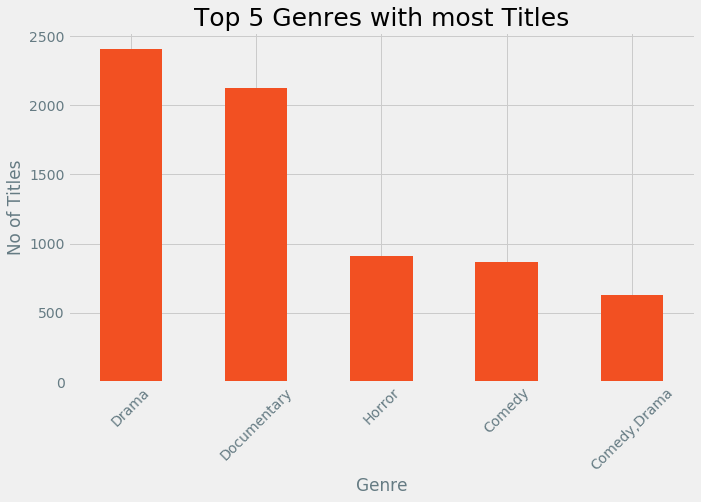

In [94]:
# Plotting Top 5 Genres with most Titles

top5.plot.bar(figsize = (10,6), color = '#f25022')
plt.title('Top 5 Genres with most Titles', fontsize = 25)
plt.xlabel('Genre')
plt.ylabel('No of Titles')
plt.xticks(rotation = 45)
plt.show();

Drama Genre has the highest number of titles.

In [95]:
# Top 10 Genres with the highest Popularity

top10 = df1.groupby('genres')['popularity'].mean().sort_values(ascending = False).head(10)
top10

genres
Adventure,Fantasy,Mystery    33.533000
Family,Fantasy,Musical       29.247000
Action,Fantasy,War           23.680000
Action,Adventure,Sci-Fi      17.089894
Drama,Horror,Music           16.574000
Action,Fantasy,Thriller      16.387000
Action,Adventure,Fantasy     14.969267
Adventure,Biography,Crime    14.656000
Action,Adventure,Thriller    14.509750
Adventure,Family,Fantasy     14.312333
Name: popularity, dtype: float64

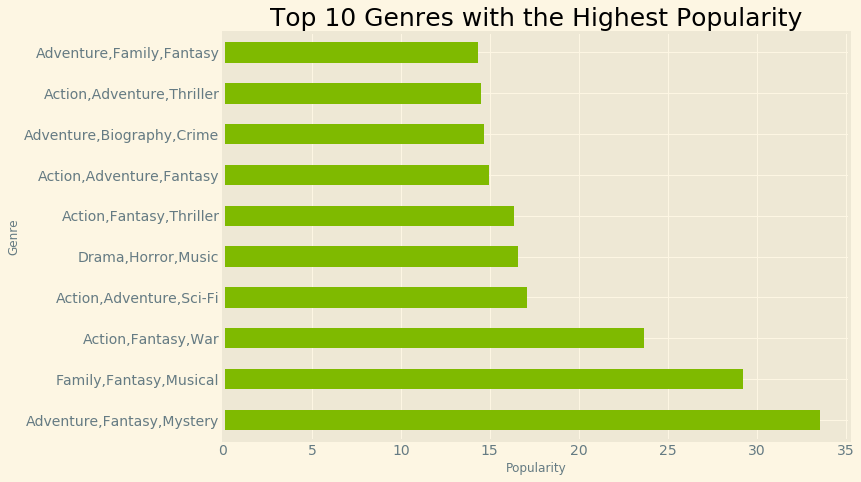

In [96]:
# Plotting Top 10 Genres with the highest Popularity

plt.style.use('Solarize_Light2')
top10.plot.barh(figsize = (10,7), color = '#7fba00')
plt.title('Top 10 Genres with the Highest Popularity', fontsize = 25)
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show();

Adventure,Fantasy,Mystery Genre has the highest popularity.

In [97]:
df.head()

,original_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,Ashad Ka Ek Din,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,La Telenovela Errante,"Comedy,Drama,Fantasy"


In [98]:
budget.head()

,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08


In [99]:
budget.describe()

,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,1.028557e+07,5.989970e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,4.992137e+07,1.460889e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,-3.072376e+08,-2.002376e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,-9.132757e+06,-2.189071e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,-3.487755e+05,8.550286e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,1.778144e+07,6.096850e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09


In [100]:
budget['worldwide_gross'].mean()

91487460.90643376

In [101]:
# total profit

budget['total_profit'] = budget['domestic_profit'] + budget['worldwide_profit']
budget.head()


,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,total_profit
0,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,2.686853e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,4.655278e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,-5.074753e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,1.200820e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,1.302903e+09


In [102]:
#merging the datasets

df2 = pd.merge(left =df, right = budget, how="inner", left_on = 'original_title', right_on = 'movie')
df2.head()

,original_title,genres,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,total_profit
0,Foodfight!,"Action,Animation,Comedy",Foodfight!,45000000.0,0.0,73706.0,-45000000.0,-44926294.0,-89926294.0
1,Mortal Kombat,"Action,Adventure,Fantasy",Mortal Kombat,20000000.0,70433227.0,122133227.0,50433227.0,102133227.0,152566454.0
2,On the Road,"Adventure,Drama,Romance",On the Road,25000000.0,720828.0,9313302.0,-24279172.0,-15686698.0,-39965870.0
3,On the Road,Drama,On the Road,25000000.0,720828.0,9313302.0,-24279172.0,-15686698.0,-39965870.0
4,On the Road,Documentary,On the Road,25000000.0,720828.0,9313302.0,-24279172.0,-15686698.0,-39965870.0


In [103]:
# Top 5 genres with the highest profit

df3 = df2.groupby('genres')['total_profit'].mean().sort_values(ascending = False).head()
df3

genres
Adventure,Drama,Sport        1.373208e+09
Family,Fantasy,Musical       1.193851e+09
Adventure,Animation,Drama    7.893419e+08
Fantasy,Musical              4.768411e+08
Action,Adventure,Sci-Fi      4.698155e+08
Name: total_profit, dtype: float64

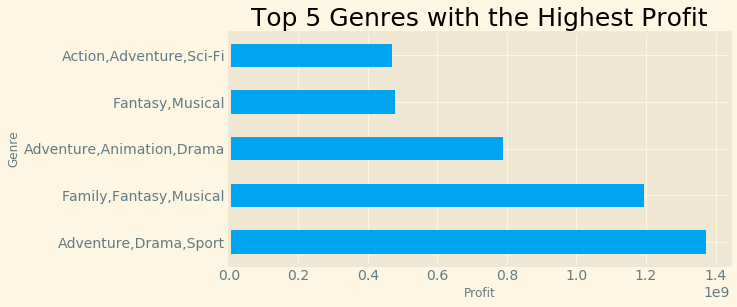

In [104]:
# Plot Top 5 Genres with the Highest Profit

df3.plot.barh(figsize = (8,4), color = '#00a4ef')
plt.title('Top 5 Genres with the Highest Profit', fontsize = 25)
plt.xlabel('Profit')
plt.ylabel('Genre')
plt.show();

Adventure, Drama, Sport Genre has the highest profit.

In [105]:
df2_hm = df2[['production_budget', 'domestic_gross', 'worldwide_gross', 'total_profit']]
df2_hm.corr()

,production_budget,domestic_gross,worldwide_gross,total_profit
production_budget,1.000000,0.700723,0.760227,0.516126
domestic_gross,0.700723,1.000000,0.947359,0.939780
worldwide_gross,0.760227,0.947359,1.000000,0.943875
total_profit,0.516126,0.939780,0.943875,1.000000


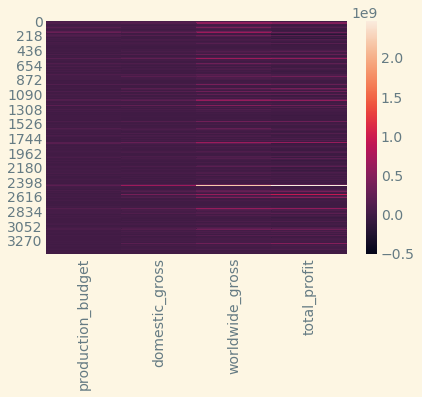

In [106]:
sns.heatmap(df2_hm);